# Business Intelligence by Geomapping

In [154]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import plotly.express as px

In [13]:
df = pd.read_csv("main_df.csv",low_memory=False)

Filter observations with geocodes and groupby type.

In [159]:
df.head()

acn  trans_id            timestamp             item          item_group  \
0   11     37777  2015-08-12 16:03:00       Core Power            Beverage   
1   11     38361  2015-08-21 08:02:00    Berries Amore            Beverage   
2   11     38360  2015-08-21 08:02:00  Smoothie Add-On            Beverage   
3   11     35130  2015-07-24 11:53:00  $2.00 Ice Cream  Food & Consumables   
4   11     35131  2015-07-24 11:53:00  $2.00 Ice Cream  Food & Consumables   

   total        membership group city state  zipcode  lat  long category  
0   2.80  Misc. Membership   NaN  NaN   NaN      NaN  NaN   NaN      Bar  
1   4.28  Misc. Membership   NaN  NaN   NaN      NaN  NaN   NaN      Bar  
2   0.67  Misc. Membership   NaN  NaN   NaN      NaN  NaN   NaN      Bar  
3   2.00  Misc. Membership   NaN  NaN   NaN      NaN  NaN   NaN      Bar  
4   2.00  Misc. Membership   NaN  NaN   NaN      NaN  NaN   NaN      Bar

In [229]:
tf_classifier = df.groupby(["acn","membership","category"])[["category"]].count().rename(columns={"category":"count"}).sort_values(by=["acn","count"],ascending=False)

In [232]:
df.item_group.unique()

array(['Beverage', 'Food & Consumables', 'String', 'Wine',
       'Special Event', 'Accessories', 'Swim Lessons', 'Adult Clinics',
       'Tennis Lessons', 'Date Night', 'Racquet Rental', 'Apparel',
       'Tennis Balls', 'Guest Fee', 'Beer', 'Membership Dues',
       'Food Allowance', 'Dinners', 'Fitness Special Event',
       'Membership Initiation', 'Personal Training', 'Shoes',
       'Restring/ Labor Only', 'Social Event',
       'Homeowner Membership Initiation', 'Leagues', 'Fitness Lessons',
       '24 Hour of Tennis', 'Facility Rental', 'Camp', 'Racquets',
       'Junior Clinics', 'Swim Camp', 'Kid Fit', 'Court Time',
       'Teen Performance Camp', 'Sponsorship'], dtype=object)

In [230]:
tf_classifier

count
acn  membership                category       
5434 General Family Membership Program       2
5428 General Family Membership Admin         2
5425 General Family Membership Bar           5
                               Admin         3
5424 General Family Membership Admin         1
5397 Guest                     Tennis        1
5396 General Family Membership Bar          11
                               Admin         3
5392 Guest                     Tennis        1
5391 Guest                     Tennis        1
5388 General Family Membership Bar           1
5387 General Family Membership Admin         3
                               Bar           3
5378 Veramendi Teacher         Admin         3
5374 Guest                     Pro Shop      4
5368 General Family Membership Bar           5
                               Tennis        1
5367 Guest                     Tennis        2
5366 Guest                     Tennis        1
5361 General Family Membership Admin         5
5360 Guest                     Tennis        1
5359 Guest                     Bar           1
5358 Guest                     Bar           1
5356 General Family Membership Admin         7
     General Single Membership Admin         7
     General Family Membership Bar           1
     General Single Membership Bar           1
5353 General Family Membership Admin         3
5352 Guest                     Pro Shop      2
                               Tennis        2
...                                        ...
55   General Single Membership Event         4
                               Pro Shop      3
47   General Family Membership Admin         4
     General Property Owner    Admin         4
     General Family Membership Bar           2
     General Property Owner    Bar           2
42   General Family Membership Bar          84
                               Admin        24
                               Pro Shop     12
                               Fitness       6
                               Event         2
34   General Family Membership Admin        31
                               Event         8
                               Bar           4
33   General Family Membership Admin        46
                               Bar          32
                               Event         5
                               Pro Shop      3
23   Misc. Membership          Bar         146
                               Tennis       31
                               Pro Shop      1
17   Guest                     Bar           2
     Misc. Membership          Bar           2
     Guest                     Pro Shop      1
     Misc. Membership          Pro Shop      1
11   Misc. Membership          Bar         191
                               Pro Shop      8
                               Tennis        5
                               Event         3
                               Program       3

[6645 rows x 1 columns]

In [179]:
tf_classifier = tf_classifier.drop_duplicates(subset="acn",keep="first")

In [185]:
tf_classifier = tf_classifier[["acn","category"]]

In [187]:
tf_classifier.set_index("acn",inplace=True)

In [199]:
tf_classifier.columns = ["tendency"]

In [217]:
tf_classifier.tendency.unique()

array(['Program', 'Admin', 'Bar', 'Tennis', 'Pro Shop', 'Fitness',
       'Event'], dtype=object)

In [201]:
add = df[df.lat.notna() & df.long.notna()]
add = add[add.acn != 2512]

In [202]:
acn_with_add = list(with_add.acn.unique())
add = add[add.acn.isin(acn_with_add)]

In [203]:
add.head()

acn  trans_id            timestamp  \
83477  1303     36628  2015-07-31 00:00:00   
83478  1303     37385  2015-08-06 20:42:00   
83479  1303     37397  2015-08-06 21:02:00   
83480  1303     37395  2015-08-06 20:48:00   
83481  1303     31908  2015-06-30 00:00:00   

                                                    item          item_group  \
83477  Membership for &quot;General Family Membership...     Membership Dues   
83478                                    $2.00 Ice Cream  Food & Consumables   
83479                              Michelob Ultra Bottle                Beer   
83480                                     Child's Dinner             Dinners   
83481  Membership for &quot;General Family Membership...     Membership Dues   

        total                 membership                      group  \
83477  140.73  General Family Membership  General Family Membership   
83478    2.00  General Family Membership  General Family Membership   
83479    2.75  General Family Membership  General Family Membership   
83480    5.41  General Family Membership  General Family Membership   
83481  140.73  General Family Membership  General Family Membership   

                city state  zipcode        lat       long category  
83477  NEW BRAUNFELS    TX  78132.0  29.714595 -98.285693    Admin  
83478  NEW BRAUNFELS    TX  78132.0  29.714595 -98.285693      Bar  
83479  NEW BRAUNFELS    TX  78132.0  29.714595 -98.285693      Bar  
83480  NEW BRAUNFELS    TX  78132.0  29.714595 -98.285693    Event  
83481  NEW BRAUNFELS    TX  78132.0  29.714595 -98.285693    Admin

In [209]:
add = add.merge(tf_classifier,how="left",left_on="acn",right_on=tf_classifier.index)

In [211]:
add.head()

acn  trans_id            timestamp  \
0  1303     36628  2015-07-31 00:00:00   
1  1303     37385  2015-08-06 20:42:00   
2  1303     37397  2015-08-06 21:02:00   
3  1303     37395  2015-08-06 20:48:00   
4  1303     31908  2015-06-30 00:00:00   

                                                item          item_group  \
0  Membership for &quot;General Family Membership...     Membership Dues   
1                                    $2.00 Ice Cream  Food & Consumables   
2                              Michelob Ultra Bottle                Beer   
3                                     Child's Dinner             Dinners   
4  Membership for &quot;General Family Membership...     Membership Dues   

    total                 membership                      group  \
0  140.73  General Family Membership  General Family Membership   
1    2.00  General Family Membership  General Family Membership   
2    2.75  General Family Membership  General Family Membership   
3    5.41  General Family Membership  General Family Membership   
4  140.73  General Family Membership  General Family Membership   

            city state  zipcode        lat       long category tendency_x  \
0  NEW BRAUNFELS    TX  78132.0  29.714595 -98.285693    Admin        NaN   
1  NEW BRAUNFELS    TX  78132.0  29.714595 -98.285693      Bar        NaN   
2  NEW BRAUNFELS    TX  78132.0  29.714595 -98.285693      Bar        NaN   
3  NEW BRAUNFELS    TX  78132.0  29.714595 -98.285693    Event        NaN   
4  NEW BRAUNFELS    TX  78132.0  29.714595 -98.285693    Admin        NaN   

  tendency_y  
0        Bar  
1        Bar  
2        Bar  
3        Bar  
4        Bar

In [194]:
add.long.describe()

count    22097.000000
mean       -98.150379
std          0.260351
min        -98.666598
25%        -98.199469
50%        -98.191089
75%        -98.167083
max        -95.126631
Name: long, dtype: float64

In [85]:
in_vicinity = add[(add.lat>29.65) & (add.lat <29.74) & (add.long < (97.5*-1))]

In [149]:
in_vicinity.head()

acn  trans_id            timestamp  \
83477  1303     36628  2015-07-31 00:00:00   
83478  1303     37385  2015-08-06 20:42:00   
83479  1303     37397  2015-08-06 21:02:00   
83480  1303     37395  2015-08-06 20:48:00   
83481  1303     31908  2015-06-30 00:00:00   

                                                    item          item_group  \
83477  Membership for &quot;General Family Membership...     Membership Dues   
83478                                    $2.00 Ice Cream  Food & Consumables   
83479                              Michelob Ultra Bottle                Beer   
83480                                     Child's Dinner             Dinners   
83481  Membership for &quot;General Family Membership...     Membership Dues   

        total                 membership                      group  \
83477  140.73  General Family Membership  General Family Membership   
83478    2.00  General Family Membership  General Family Membership   
83479    2.75  General Family Membership  General Family Membership   
83480    5.41  General Family Membership  General Family Membership   
83481  140.73  General Family Membership  General Family Membership   

                city state  zipcode        lat       long category  \
83477  NEW BRAUNFELS    TX  78132.0  29.714595 -98.285693    Admin   
83478  NEW BRAUNFELS    TX  78132.0  29.714595 -98.285693      Bar   
83479  NEW BRAUNFELS    TX  78132.0  29.714595 -98.285693      Bar   
83480  NEW BRAUNFELS    TX  78132.0  29.714595 -98.285693    Event   
83481  NEW BRAUNFELS    TX  78132.0  29.714595 -98.285693    Admin   

                         geometry  
83477  POINT (-98.28569 29.71459)  
83478  POINT (-98.28569 29.71459)  
83479  POINT (-98.28569 29.71459)  
83480  POINT (-98.28569 29.71459)  
83481  POINT (-98.28569 29.71459)

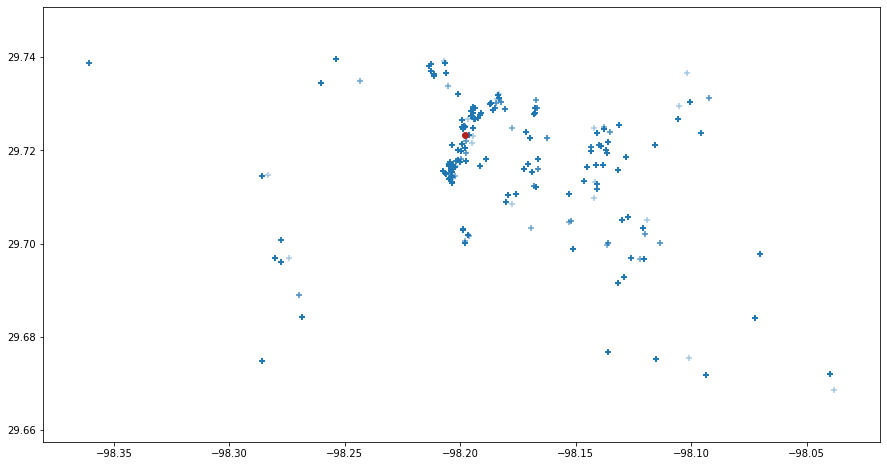

In [133]:
plt.figure(figsize=(15,8))
plt.scatter(x="long",y="lat",alpha=.4,data=in_vicinity,marker = "+")
plt.scatter(y=29.723358,x=-98.1981613,color="firebrick") #jncc
plt.show()

---

In [150]:
in_vicinity.to_csv("in_vicinity.csv",index=False)

In [234]:
fig = px.scatter_mapbox(add, lat="lat", lon="long", hover_name="membership", hover_data=["city", "acn"],
                        color="tendency_y", color_discrete_sequence=["black","navy","black","black","black","black","firebrick"], zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()